## introduction to pandas

- enviroment setting:
pd.set_option('precision', 1)
pd.option.display.float_format = 

- index: [], ., loc, iloc, ix.
set_index()  and &  or |  not ~

- attribution:
columns, index, name, values

- method:
head(), describe()

- plot(kind = "bar")
hist()
pie()
bar()
kde()

- sort_values(by = columns_name, inplace = True)
sort_index()

- idmax() = argmax()
unique()
values_counts()
duplicated()
drop_duplicates()
isnull()
fillna(what)
map() 
apply()


- str.upper()
str.lower()
str.len()

- mutilindex
pivot_table(values, index, columns)
stack(level = (0,1))
unstack(level = 2)
transpose()
multi-index  idx 

- merge()
concat()

- group
groupby()
.get_group()
.groups.keys()









## Introduction to Matlibplot.pyplot

fig, ax = plt.subplot(row, columns, figsize = (12,12))

plot(x,y, color, linewidth, label, lines)
ax.legand
ax.label
ax.xlim
ax.ylim
                                                                                                                                                                                                                                                                                                                                                                                                                                                           




## Introduction of scipy

- scipy.optimize
brentq
minimize(function, initial, method)
bisect(function, initial)
newton(function, initial)
fsolve: multi-dimention don't use it unless
fixed_point(function, initial)
fminbound(function, a, b) minimize function with boundary


- scipy.integrate
quad approximating of polynomial


- scipy.stats
pdf, cdf, pps, rvs
.nrom(shape, loc, scale) Y = c + dX
gradient, intercept, r_value, p_value, std_err = linregress(x,y)

- numpy.linalg



## Introduction of optimization 

1. Bisection
require boundary point value at opposite sign.

2. Newton-Raphson
using the information of second moment, expand the function at xn
$$ f(x_{n+1}) = f(x_n) + f(x_n)'\times(x_n - x_{n+1}) $$
We suppose $f(x_{n+1}) = 0$ so:
$$x_{n+1} = x_n -\frac{f(x_n)}{f'(x_n)} $$

3. Nelder-Mead
sort transpose extend inner shrink

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

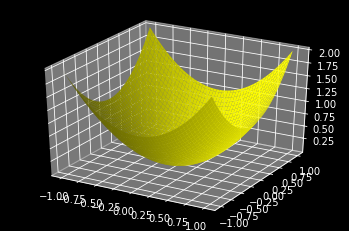

In [6]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
f = lambda x, y: x**2 + y**2
x,y = np.linspace(-1,1,100), np.linspace(-1,1,100)
x,y = np.meshgrid(x,y)

fig = plt.figure()
ax = fig.gca( projection='3d')
ax.plot_surface(x,y,f(x,y), color = "yellow")
plt.show()























## left to be down the etree.element calss function

In [ ]:
# parse xml html
parser = etree.XMLParser(ns_clean=True)
parser = etree.HTMLParser()
tree = etree.parse(StringIO(xml), parser)

a = etree.fromstring()
etree.tostring(a)
etree.tostring(html, pretty_print=True, method="html")
c = etree.parse(StringIO(xml))
root = etree.fromstring(xml, base_url="http://where.it/is/from.xml")


# etree class

etree.lable
etree.classes
etree.tag
el.tag for el in root